In [14]:
import pandas as pd
import numpy as np
filepath=r'C:\Users\Administrator\Desktop\hsgl\rawdata.xlsx'

rou=0.5
maxVal=0.0
minVal=0.0
def getData(filepath):
    data=pd.read_excel(filepath,encoding='utf-8_sig',
                      index_col=0)
#     print(data.head(5))
    return data

def calCoef(rdata):
    dval=minVal+rou*maxVal/(rdata+rou*maxVal)
    return dval

def getLoopData(inputData):
    global minVal,maxVal
    coefDf=pd.DataFrame()
    coefDf.reindex=inputData.index
    columns=inputData.index.values
    
    rows,cols=inputData.shape
    for i in range(rows):
        normData=rawData/rawData.iloc[i]
        absData=abs(normData-normData.iloc[i])
        maxVal=max(absData.max())
        minVal=min(absData.min())
        
        glxs=absData.apply(lambda row:calCoef(row))
        coefDf[columns[i]]=glxs.mean(axis=1)
#         print(glxs.mean(axis=1))
#     dataw=df.as_matrix()
    dataT=coefDf.as_matrix().T
#     print(dataT)
    newdf=pd.DataFrame(dataT,columns=columns)
    newdf.index=coefDf.index
    return newdf

rawData=getData(filepath)
coedata=getLoopData(rawData)
print(coedata.index)
print(coedata.loc["建筑业"]["工业"])
# m,n=rawData.shape
# # print(rawData.iloc[m-1])
# normData=rawData/rawData.iloc[m-1]
# # print(normData.head(5))

# absData=abs(normData-normData.iloc[m-1])
# maxVal=max(absData.max())
# minVal=min(absData.min())
# rou=0.5
# glxs=absData.apply(lambda row:calCoef(row))
# # print(glxs.mean(axis=1))
# # print(glxs.index.values[1])
# glxs1=absData.apply(lambda row:calCoef(row))


# coefDf[glxs.index.values[m-1]]=glxs.mean(axis=1)
# # coefDf[glxs.index.values[2]]=glxs
# print(coefDf)

Index(['农林牧渔业', '工业', '建筑业', '批发和零售业', '交通运输、仓储和邮政业', '住宿和餐饮业', '金融业', '房地产业',
       '其他服务业'],
      dtype='object')
0.35353164636359946


E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


{'工业': '工业', '建筑业': '建筑业', '批发和零售业': '批发和零售业', '金融业': '金融业', '其他服务业': '其他服务业'}


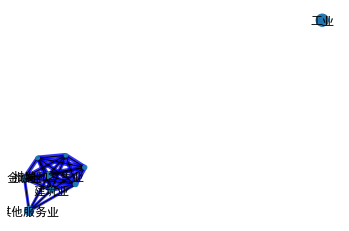

In [1]:
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

global minVal,maxVal

class GCoeffience(object):
    def __init__(self,fpath,rou):
        self.fpath = fpath
        self.rou = rou
        
        self.rawData=self.getData()
        
        self.node_size=self.rawData.mean(axis=1)*400/self.rawData.mean(axis=1).sum()
        
        self.labels=self.rawData.index.values
        
        self.resData=pd.DataFrame()
        
        self.outData,self.relation=self.getLoopData()
        
    def getData(self):
        data=pd.read_excel(filepath,encoding='utf-8_sig',
                      index_col=0)
        return data
    
    def calCoef(self,rdata):
        dval=minVal+rou*maxVal/(rdata+rou*maxVal)
        return dval
      
    def getLoopData(self):
        global minVal,maxVal
        self.resData.reindex=self.rawData.index
        columns=self.rawData.index.values

        rows,cols=self.rawData.shape
        for i in range(rows):
            normData=self.rawData/self.rawData.iloc[i]
            absData=abs(normData-normData.iloc[i])
            maxVal=max(absData.max())
            minVal=min(absData.min())

            glxs=absData.apply(lambda row:self.calCoef(row))
            self.resData[columns[i]]=glxs.mean(axis=1)
    #         print(glxs.mean(axis=1))
    #     dataw=df.as_matrix()
        dataT=self.resData.values.T
        relation=(self.resData.values+dataT)/2
        newdf=pd.DataFrame(dataT,columns=columns)
        newdf.index=self.rawData.index
#         print(newdf)
        return newdf,np.triu(relation)

    def show_labels(self):
        labls={}
        for (lbl,ns) in zip(self.labels,self.node_size.values):
            if ns >=25:
                labls[lbl]=lbl
        print(labls)
        return labls

    def create_ntx_pds(self):
        self.outData[self.outData<0.56]=0
        G=nx.from_pandas_adjacency(self.outData,create_using = nx.MultiGraph)
        pos=nx.spring_layout(G)
        
        pd_labels=self.show_labels()
        nx.draw_networkx_edges(G,pos,with_labels=False,edge_color='blue',
                              alpha=0.8,width=[float(v['weight']*5) for (r,c,v) in G.edges(data=True)])
        nx.draw_networkx_labels(G,pos,pd_labels,font_size=12)
        nx.draw_networkx(G,pos,node_size=self.node_size.values,with_labels=False)

    def create_ntx_mat(self):
        G=nx.from_numpy_matrix(self.relation,create_using=nx.MultiDiGraph)
        pos=nx.spring_layout(G)
        labls=show_labels(self.labels,self.node_size.values)
    #     nx.draw(G)
    #     nx.draw_networkx_labels(G,pos,labls,font_size=12)
        nx.draw_networkx(G,pos,node_size=self.node_size,
                        with_labels=False)
        
    def show_graph(self):
        plt.axis('off')
        plt.show()

if __name__=="__main__":
    filepath=r'C:\Users\Administrator\Desktop\hsgl\rawdata1.xlsx'
    rou=0.5
    GCModel=GCoeffience(filepath,rou)
#     GCModel.create_ntx_mat(relation,lals,node_size)
    GCModel.create_ntx_pds()
    GCModel.show_graph()
    
#     data=GCModel.getLoopData()
#     print(data)

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

global minVal,maxVal

class GCoeffience(object):
    def __init__(self,fpath,rou):
        self.fpath = fpath
        self.rou = rou
        
        self.rawData=self.getData()
        
        self.node_size=self.rawData.mean(axis=1)*400/self.rawData.mean(axis=1).sum()
        
        self.labels=self.rawData.index.values
        
        self.resData=pd.DataFrame()
        
        self.outData,self.relation=self.getLoopData()
        
    def getData(self):
        data=pd.read_excel(filepath,encoding='utf-8_sig',
                      index_col=0)
        return data
    
    def calCoef(self,rdata):
        dval=minVal+rou*maxVal/(rdata+rou*maxVal)
        return dval
      
    def getLoopData(self):
        global minVal,maxVal
        self.resData.reindex=self.rawData.index
        columns=self.rawData.index.values

        rows,cols=self.rawData.shape
        for i in range(rows):
            normData=self.rawData/self.rawData.iloc[i]
            absData=abs(normData-normData.iloc[i])
            maxVal=max(absData.max())
            minVal=min(absData.min())

            glxs=absData.apply(lambda row:self.calCoef(row))
            self.resData[columns[i]]=glxs.mean(axis=1)
    #         print(glxs.mean(axis=1))
    #     dataw=df.as_matrix()
        dataT=self.resData.values.T
        relation=(self.resData.values+dataT)/2
        newdf=pd.DataFrame(dataT,columns=columns)
        newdf.index=self.rawData.index
#         print(newdf)
        return newdf,np.triu(relation)
\

def show_labels(labels,node_size):
    labls={}
    for (lbl,ns) in zip(labels,node_size):
        if ns >=25:
            labls[lbl]=lbl
    print(labls)
    return labls

def create_ntx_pds(pd_relation,labels,node_size):
    G=nx.from_pandas_adjacency(pd_relation)
    pos=nx.spring_layout(G)
    pd_labels=show_labels(labels,node_size)
    nx.draw_networkx_labels(G,pos,pd_labels,font_size=12)
    nx.draw_networkx(G,pos,node_size=node_size,with_labels=False)
    plt.show()

def create_ntx_mat(relation,labels,node_size):
    G=nx.from_numpy_matrix(relation,create_using=nx.MultiGraph)
    pos=nx.spring_layout(G)
    labls=show_labels(labels,node_size)
#     nx.draw(G)
#     nx.draw_networkx_labels(G,pos,labls,font_size=12)
    nx.draw_networkx(G,pos,node_size=node_size,
                    with_labels=False)
    print(G[2][5])
    plt.show()

if __name__=="__main__":
    filepath=r'C:\Users\Administrator\Desktop\hsgl\rawdata1.xlsx'
    rou=0.5
    GCModel=GCoeffience(filepath,rou)
    pd_relation=GCModel.outData
    relation=GCModel.relation
    node_size=GCModel.node_size.values
#     print(node_size)
    lals=GCModel.labels
#     print(lals)
#     create_ntx_mat(relation,lals,node_size)
    create_ntx_pds(pd_relation,lals,node_size)
#     data=GCModel.getLoopData()
#     print(data)

In [4]:
###当前此部分代码主要是为了展示
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

def getData(fpath):
    data=pd.read_csv(fpath,encoding='utf-8_sig')
    print(data.head(5))

def getGroupData(rawData):
    prc_data=rawData.drop_duplicates()
#     prc_data.groupby([u''])
    
if __name__=="__main__":
    fipath=r'C:\Users\Administrator\Desktop\tpTest\hygs_qxb.csv'
    getData(fipath)

   产业类别 行业大类代码  行业小类代码        行业大类      行业小类  企业数量  Unnamed: 6
0  第一产业      A       1  农、林、牧、渔服务业        农业  4506   29.450980
1  第一产业      A       2  农、林、牧、渔服务业        林业   137    0.895425
2  第一产业      A       3  农、林、牧、渔服务业       畜牧业  1455    9.509804
3  第一产业      A       4  农、林、牧、渔服务业        渔业   739    4.830065
4  第二产业      B       6         采矿业  煤炭开采和洗选业     9    0.058824


###当前此部分代码主要是为了展示
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

def getData(fpath):
    data=pd.read_excel(fpath,encoding='utf-8_sig',index=False,parse_date=True)
    print(data.head(5))

def getGroupData(rawData):
    prc_data=rawData.drop_duplicates()
#     prc_data.groupby([u''])
    
if __name__=="__main__":
    fipath=r'C:\Users\Administrator\Desktop\tpTest\hygs_qxb.csv'
    getData(fipath)
###当前此部分代码主要是为了展示
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

def getData(fpath):
    data=pd.read_csv(fpath,encoding='utf-8_sig',index=False,parse_date=True)
    print(data.head(5))

def getGroupData(rawData):
    prc_data=rawData.drop_duplicat